1.Distribution of listening events by user - Female Users

In [ ]:
# importing the required librariries for reading the matlab file and loading the UAM
import numpy as np
import h5py
from scipy import sparse

# Defining the file names
UAM_MATLAB_FILE = 'LFM-1b_LEs.mat'                        # Matlab .mat file where the listening events are stored
USER_DATA_FILE = 'output_data_new.txt'                    # Text file containing user data (including both genders m,f)
STATISTICS_OUTPUT_FILE_FEMALE = 'LFM-1b_stats_users.txt'   # output file for statistics

# Defining a function to read the User-Artist Matrix (UAM) from a MATLAB file and process user date
def read_UAM(m_file, user_data_file):
    mf = h5py.File(m_file, 'r') # Opening the MATLAB file using h5py

    # Reading the user and artist indices from the MATLAB file and converting them to np.int64
    user_ids = np.array(mf['idx_users']).astype(np.int64)[ :47587]
    artist_ids = np.array(mf['idx_artists']).astype(np.int64)

    # Loading the UAM
    # Converting the sparse UAM data from the MATLAB file into a CSR sparse matrix
    UAM = sparse.csr_matrix((mf['/LEs/']['data'][()],
                             mf['/LEs/']['ir'][()],
                             mf['/LEs/']['jc'][()])).transpose()


    # Reading gender and filtering only female information from user data file
    # Loading data from text file with each row representing a user's data
    user_data = np.loadtxt(user_data_file, dtype=np.str)

    # Extracting the gender information and converting it to binary values (1 for female, 0 for male)
    gender_ids = (user_data[:, 3] == 'f').astype(np.int64)

    # Selecting only the female user IDs from the UAM and limiting the number to 47586
    # Filtering users based on gender (female)
    female_user_ids = user_ids[gender_ids == 1][ :47586]

    # Getting the indices of female users in the UAM
    user_indices = np.where(np.isin(user_ids, female_user_ids))[0]
    artist_indices = np.where(np.isin(artist_ids, artist_ids))[0]
    UAM = UAM[user_indices][:, artist_indices]

    # Getting the user and artist indices to access UAM
    UAM_user_idx = UAM.indices
    UAM_artist_idx = UAM.indptr

    # Returning the processed UAM and additional data
    return UAM, UAM_user_idx, UAM_artist_idx, female_user_ids, artist_ids

if __name__ == '__main__':
    # Reading the UAM
    UAM, UAM_user_idx, UAM_artist_idx, female_user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE, USER_DATA_FILE)
    print ('Female Users: ', len(female_user_ids))
    print ('Artists: ', len(artist_ids))

    # Compute some basic statistics with respect to no of artist each user listens to
    pc_sum = np.zeros((len(female_user_ids)), dtype=np.int32)
    pc_uniqe_artist = np.zeros((len(female_user_ids)), dtype=np.int32)
    pc_mean = np.zeros((len(female_user_ids)), dtype=np.float32)
    pc_median = np.zeros((len(female_user_ids)), dtype=np.float32)
    pc_std = np.zeros((len(female_user_ids)), dtype=np.float32)

    for i in range(0, len(female_user_ids)):
        pc_i = UAM.getrow(i).toarray()
        idx_nz = np.nonzero(pc_i)
        pc_uniqe_artist[i] = len(idx_nz[1])
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
        print ('User ' + str(i) +    " Playcount: " + str(pc_sum[i]) +
                                    "   artists: " + str(pc_uniqe_artist[i]) + \
                                    "   Mean PC/artists: " + str(pc_mean[i]) + \
                                    "   Std. PC/artists: " + str(pc_std[i]) + \
                                    "   Median PC/artists: " + str(pc_median[i]))

    # Storing the computed statistice to a file
    np.savetxt(STATISTICS_OUTPUT_FILE_FEMALE, np.column_stack((pc_sum, pc_uniqe_artist, pc_mean, pc_std, pc_median)), fmt="%.3f")



<ipython-input-1-23d6e637885a>:28: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  user_data = np.loadtxt(user_data_file, dtype=np.str)


Streaming output truncated to the last 5000 lines.
User 8501 Playcount: 7146   artists: 178   Mean PC/artists: 40.14607   Std. PC/artists: 119.033516   Median PC/artists: 4.0
User 8502 Playcount: 11882   artists: 100   Mean PC/artists: 118.82   Std. PC/artists: 207.04422   Median PC/artists: 31.5
User 8503 Playcount: 19967   artists: 132   Mean PC/artists: 151.26515   Std. PC/artists: 363.48227   Median PC/artists: 11.0
User 8504 Playcount: 4229   artists: 979   Mean PC/artists: 4.319714   Std. PC/artists: 6.6710944   Median PC/artists: 2.0
User 8505 Playcount: 48443   artists: 1394   Mean PC/artists: 34.751076   Std. PC/artists: 92.9262   Median PC/artists: 5.0
User 8506 Playcount: 1217   artists: 215   Mean PC/artists: 5.6604652   Std. PC/artists: 9.585895   Median PC/artists: 2.0
User 8507 Playcount: 6894   artists: 95   Mean PC/artists: 72.56842   Std. PC/artists: 319.61172   Median PC/artists: 8.0
User 8508 Playcount: 19380   artists: 1880   Mean PC/artists: 10.308511   Std. PC/ar

Plotting graph for the distribution of listening events by user (the number of artist female listeners listen to )

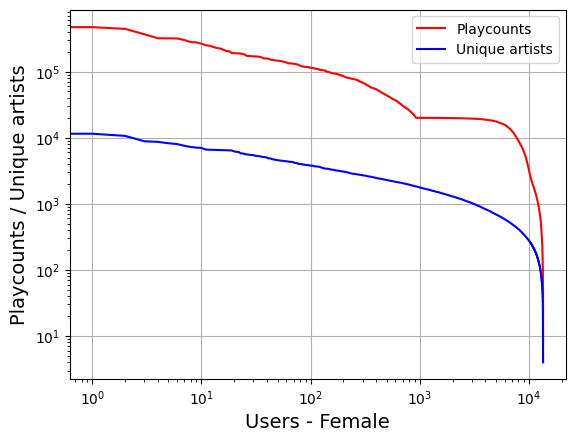

Avg_playcount =  14489.413376786904
Sdev_playcount =  20086.798207124943
Avg_artists =  730.4936671357677
Sdev_artists =  732.1907133399885
Avg_MeanPC =  28.949770757721648
Sdev_MeanPC =  66.18329079862231
Avg_MedianPC =  6.3396044737426855
Sdev_MedianPC =  24.073201474236054


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE_FEMALE = 'LFM-1b_stats_users.txt'         # output file for statistics (female data)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE_FEMALE)

    # Plotting the sorted playcounts and artists on a log-log scale
    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Unique artists'])


    plt.xlabel('Users - Female', fontsize=14)
    plt.ylabel('Playcounts / Unique artists', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_artists = np.mean(data[:, 1])
    Sdev_artists = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    # Printing the computed statistics
    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_artists = ", Avg_artists)
    print("Sdev_artists = ", Sdev_artists)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)

Plotting and calculating the number of artist that the most active, moderate/highly active and least active users (female) listen to

In [ ]:
# Load figures from file
data = np.loadtxt(STATISTICS_OUTPUT_FILE_FEMALE)

# Sort the data in descending order for both Playcounts and Unique artists
sorted_tpc = sorted(data[:, 0], reverse=True)
sorted_uqa = sorted(data[:, 1], reverse=True)

# Get x-axis values at 10^0, 10^2, and 10^4 (active listeners/users)
x_values = [10 ** 0, 10 ** 2, 10 ** 4]

# Get y-axis values for Playcounts (red plot) at x = 10^0, 10^2, and 10^4
y_values_tpc = [sorted_tpc[x] for x in x_values]

# Get y-axis values for Unique artists (blue plot) at x = 10^0, 10^2, and 10^4
y_values_uqa = [sorted_uqa[x] for x in x_values]

print("Y-values for Playcounts (red plot) at x = 10^0, 10^2, and 10^4:", y_values_tpc)
print("Y-values for Unique artists (blue plot) at x = 10^0, 10^2, and 10^4:", y_values_uqa)

Y-values for Playcounts (red plot) at x = 10^0, 10^2, and 10^4: [470237.0, 114393.0, 3249.0]
Y-values for Unique artists (blue plot) at x = 10^0, 10^2, and 10^4: [11486.0, 3785.0, 278.0]


2.Distribution of listening events by user - Male Users

In [ ]:
# importing the required librariries for reading the matlab file and loading the UAM
import numpy as np
import h5py
from scipy import sparse

# Defining the file names
UAM_MATLAB_FILE = 'LFM-1b_LEs.mat'                  # Matlab .mat file where the listening events are stored
USER_DATA_FILE = 'output_data_new.txt'                    # Text file containing user data (including both genders m,f)
STATISTICS_OUTPUT_FILE_MALE = 'LFM-1b_stats_users.txt'   # output file for statistics

# # Function to read the User-Artist Matrix (UAM) from a MATLAB file and process user data
def read_UAM(m_file, user_data_file):
    mf = h5py.File(m_file, 'r')# Opening the MATLAB file using h5py

    # Reading the user and artist indices from the MATLAB file and converting them to np.int64
    user_ids = np.array(mf['idx_users']).astype(np.int64)[ :47587]
    artist_ids = np.array(mf['idx_artists']).astype(np.int64)

    # Loading the UAM
    # Converting the sparse UAM data from the MATLAB file into a CSR sparse matrix
    UAM = sparse.csr_matrix((mf['/LEs/']['data'][()],
                             mf['/LEs/']['ir'][()],
                             mf['/LEs/']['jc'][()])).transpose()

    # Reading gender and filtering only female information from user data file
    # Loading data from text file with each row representing a user's data
    user_data = np.loadtxt(user_data_file, dtype=np.str)

    # Extracting the gender information and converting it to binary values (1 for male, 0 for female)
    gender_ids = (user_data[:, 3] == 'm').astype(np.int64)

    # Selecting only the male user IDs from the UAM and limiting the number to 47586
    # Filtering users based on gender (male)
    male_user_ids = user_ids[gender_ids == 1][ :47587]

    # Getting the indices of male users in the UAM
    user_indices = np.where(np.isin(user_ids, male_user_ids))[0]
    artist_indices = np.where(np.isin(artist_ids, artist_ids))[0]
    UAM = UAM[user_indices][:, artist_indices]


    # Getting the user and artist indices to access UAM
    UAM_user_idx = UAM.indices
    UAM_artist_idx = UAM.indptr
    return UAM, UAM_user_idx, UAM_artist_idx, male_user_ids, artist_ids

if __name__ == '__main__':
    # Reading UAM
    UAM, UAM_user_idx, UAM_artist_idx, male_user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE, USER_DATA_FILE)
    print ('Male Users: ', len(male_user_ids))
    print ('Artists: ', len(artist_ids))

    # Computing some basic statistics with respect to no of artist each user listens to
    pc_sum = np.zeros((len(male_user_ids)), dtype=np.int32)
    pc_uniqe_artist = np.zeros((len(male_user_ids)), dtype=np.int32)
    pc_mean = np.zeros((len(male_user_ids)), dtype=np.float32)
    pc_median = np.zeros((len(male_user_ids)), dtype=np.float32)
    pc_std = np.zeros((len(male_user_ids)), dtype=np.float32)

    for i in range(0, len(male_user_ids)):
        pc_i = UAM.getrow(i).toarray()
        idx_nz = np.nonzero(pc_i)
        pc_uniqe_artist[i] = len(idx_nz[1])
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
        print ('User ' + str(i) +    " Playcount: " + str(pc_sum[i]) +
                                    "   artists: " + str(pc_uniqe_artist[i]) + \
                                    "   Mean PC/artists: " + str(pc_mean[i]) + \
                                    "   Std. PC/artists: " + str(pc_std[i]) + \
                                    "   Median PC/artists: " + str(pc_median[i]))

    # Storing the computed statistice to a file
    np.savetxt(STATISTICS_OUTPUT_FILE_MALE, np.column_stack((pc_sum, pc_uniqe_artist, pc_mean, pc_std, pc_median)), fmt="%.3f")


<ipython-input-5-dfdf81c6aec9>:27: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  user_data = np.loadtxt(user_data_file, dtype=np.str)


Streaming output truncated to the last 5000 lines.
User 29085 Playcount: 1549   artists: 245   Mean PC/artists: 6.322449   Std. PC/artists: 9.723426   Median PC/artists: 3.0
User 29086 Playcount: 1576   artists: 566   Mean PC/artists: 2.7844522   Std. PC/artists: 6.0687613   Median PC/artists: 1.0
User 29087 Playcount: 19969   artists: 171   Mean PC/artists: 116.77778   Std. PC/artists: 1006.91046   Median PC/artists: 8.0
User 29088 Playcount: 14546   artists: 2348   Mean PC/artists: 6.19506   Std. PC/artists: 17.820831   Median PC/artists: 2.0
User 29089 Playcount: 19729   artists: 415   Mean PC/artists: 47.53976   Std. PC/artists: 112.158356   Median PC/artists: 6.0
User 29090 Playcount: 10050   artists: 98   Mean PC/artists: 102.55102   Std. PC/artists: 109.057945   Median PC/artists: 63.0
User 29091 Playcount: 6671   artists: 831   Mean PC/artists: 8.027678   Std. PC/artists: 22.776588   Median PC/artists: 2.0
User 29092 Playcount: 9687   artists: 632   Mean PC/artists: 15.327532  

Plotting graph for the distribution of listening events by user (the number of artist male listeners listen to )

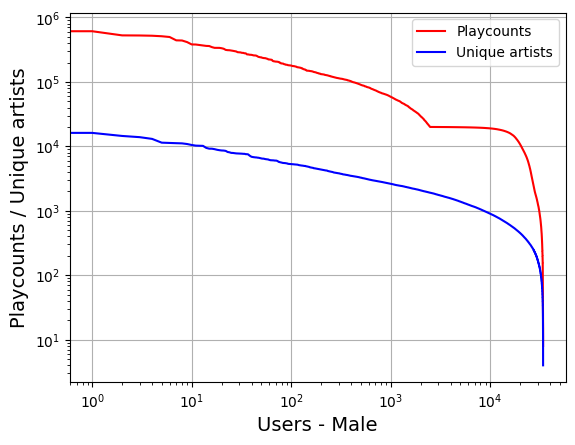

Avg_playcount =  15481.446472055157
Sdev_playcount =  22285.96284845908
Avg_artists =  784.5197300865483
Sdev_artists =  803.7661017058848
Avg_MeanPC =  28.09123370984304
Sdev_MeanPC =  50.33093327457534
Avg_MedianPC =  6.189716884259939
Sdev_MedianPC =  27.61734346632474


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE_MALE = 'LFM-1b_stats_users.txt'         # output file for statistics (male data)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE_MALE)

    # Plotting the sorted playcounts and artists on a log-log scale
    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Unique artists'])


    plt.xlabel('Users - Male', fontsize=14)
    plt.ylabel('Playcounts / Unique artists', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_artists = np.mean(data[:, 1])
    Sdev_artists = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    # Printing the computed statistics
    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_artists = ", Avg_artists)
    print("Sdev_artists = ", Sdev_artists)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)



Plotting and calculating the number of artist that the most active, moderate/highly active and least active users (male) listen to

In [ ]:
# Load figures from file
data = np.loadtxt(STATISTICS_OUTPUT_FILE_MALE)

# Sort the data in descending order for both Playcounts and Unique artists
sorted_tpc = sorted(data[:, 0], reverse=True)
sorted_uqa = sorted(data[:, 1], reverse=True)

# Get x-axis values at 10^0, 10^2, and 10^4 (active listeners/users)
x_values = [10 ** 0, 10 ** 2, 10 ** 4]

# Get y-axis values for Playcounts (red plot) at x = 10^0, 10^2, and 10^4
y_values_tpc = [sorted_tpc[x] for x in x_values]

# Get y-axis values for Unique artists (blue plot) at x = 10^0, 10^2, and 10^4
y_values_uqa = [sorted_uqa[x] for x in x_values]

print("Y-values for Playcounts (red plot) at x = 10^0, 10^2, and 10^4:", y_values_tpc)
print("Y-values for Unique artists (blue plot) at x = 10^0, 10^2, and 10^4:", y_values_uqa)

Y-values for Playcounts (red plot) at x = 10^0, 10^2, and 10^4: [611786.0, 179555.0, 19010.0]
Y-values for Unique artists (blue plot) at x = 10^0, 10^2, and 10^4: [16185.0, 5307.0, 901.0]


3. Overall that is both Female & Male Users - Distribution of Listening events by user

In [ ]:
# importing the required librariries for reading the matlab file and loading the UAM
import numpy as np
import h5py
from scipy import sparse

# Defining the file names
UAM_MATLAB_FILE = 'LFM-1b_LEs.mat'                  # Matlab .mat file where the listening events are stored
USER_DATA_FILE = 'output_data_new.txt'                    # Text file containing user data (including gender)
STATISTICS_OUTPUT_FILE_BOTH = 'LFM-1b_stats_users.txt'   # output file for statistics

# Function to read the User-Artist Matrix (UAM) from a MATLAB file and process user data
def read_UAM(m_file, user_data_file):
    mf = h5py.File(m_file, 'r') # Opening the MATLAB file using h5py

    # Reading the user and artist indices from the MATLAB file and converting them to np.int64
    user_ids = np.array(mf['idx_users']).astype(np.int64)[:47587]  #slicing notation to extract a subset
    artist_ids = np.array(mf['idx_artists']).astype(np.int64)

    # Loading the UAM
    # Converting the sparse UAM data from the MATLAB file into a CSR sparse matrix
    UAM = sparse.csr_matrix((mf['/LEs/']['data'][()],
                             mf['/LEs/']['ir'][()],
                             mf['/LEs/']['jc'][()])).transpose()

    # Reading gender and filtering only female information from user data file
    # Loading data from text file with each row representing a user's data
    user_data = np.loadtxt(user_data_file, dtype=np.str)

    # Extracting the gender information and converting it to binary values (1 for male, 0 for female)
    gender_ids = np.isin(user_data[:, 3], ['f', 'm']).astype(np.int64)  # Include both female and male users

    # Getting both users based on gender (both female and male) in the UAM
    user_indices = np.where(gender_ids == 1)[0]
    artist_indices = np.where(np.isin(artist_ids, artist_ids))[0]
    UAM = UAM[user_indices][:, artist_indices]

    # Getting the user and artist indices to access UAM
    UAM_user_idx = UAM.indices
    UAM_artist_idx = UAM.indptr
    return UAM, UAM_user_idx, UAM_artist_idx, user_ids[user_indices], artist_ids

if __name__ == '__main__':
    # Reading UAM
    UAM, UAM_user_idx, UAM_artist_idx, user_ids, artist_ids = read_UAM(UAM_MATLAB_FILE, USER_DATA_FILE)
    print('Male and Female Users: ', len(user_ids))
    print('Artists: ', len(artist_ids))

    # Compute some basic statistics with respect to no of artist each user listens to
    pc_sum = np.zeros((len(user_ids)), dtype=np.int32)
    pc_uniq_artists = np.zeros((len(user_ids)), dtype=np.int32)
    pc_mean = np.zeros((len(user_ids)), dtype=np.float32)
    pc_median = np.zeros((len(user_ids)), dtype=np.float32)
    pc_std = np.zeros((len(user_ids)), dtype=np.float32)

    for i in range(0, len(user_ids)):
        pc_i = UAM.getrow(i).toarray()
        idx_nz = np.nonzero(pc_i)
        pc_uniq_artists[i] = len(idx_nz[1])
        pc_sum[i] = np.sum(pc_i[idx_nz])
        pc_mean[i] = np.mean(pc_i[idx_nz])
        pc_std[i] = np.std(pc_i[idx_nz])
        pc_median[i] = np.median(pc_i[idx_nz])
        print ('User ' + str(i) +    "   Playcount: " + str(pc_sum[i]) +
                                    "   Unique artists: " + str(pc_uniq_artists[i]) + \
                                    "   Mean PC/artist: " + str(pc_mean[i]) + \
                                    "   Std. PC/artist: " + str(pc_std[i]) + \
                                    "   Median PC/artist: " + str(pc_median[i]))

    # Storing computed statistics to a file
    np.savetxt(STATISTICS_OUTPUT_FILE_BOTH, np.column_stack((pc_sum, pc_uniq_artists, pc_mean, pc_std, pc_median)), fmt="%.3f")

<ipython-input-8-a85df9406ded>:27: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  user_data = np.loadtxt(user_data_file, dtype=np.str)


Streaming output truncated to the last 5000 lines.
User 42586   Playcount: 59926   Unique artists: 998   Mean PC/artist: 60.046093   Std. PC/artist: 144.53378   Median PC/artist: 8.0
User 42587   Playcount: 332   Unique artists: 139   Mean PC/artist: 2.3884892   Std. PC/artist: 2.4509895   Median PC/artist: 1.0
User 42588   Playcount: 515   Unique artists: 92   Mean PC/artist: 5.597826   Std. PC/artist: 8.895602   Median PC/artist: 2.0
User 42589   Playcount: 906   Unique artists: 336   Mean PC/artist: 2.6964285   Std. PC/artist: 2.814205   Median PC/artist: 2.0
User 42590   Playcount: 9911   Unique artists: 306   Mean PC/artist: 32.38889   Std. PC/artist: 89.828896   Median PC/artist: 3.0
User 42591   Playcount: 3151   Unique artists: 967   Mean PC/artist: 3.2585316   Std. PC/artist: 5.223383   Median PC/artist: 2.0
User 42592   Playcount: 14224   Unique artists: 960   Mean PC/artist: 14.816667   Std. PC/artist: 43.35272   Median PC/artist: 3.0
User 42593   Playcount: 7064   Unique ar

Plotting graph for the distribution of listening events by user (the number of artist female & male listeners listen to )

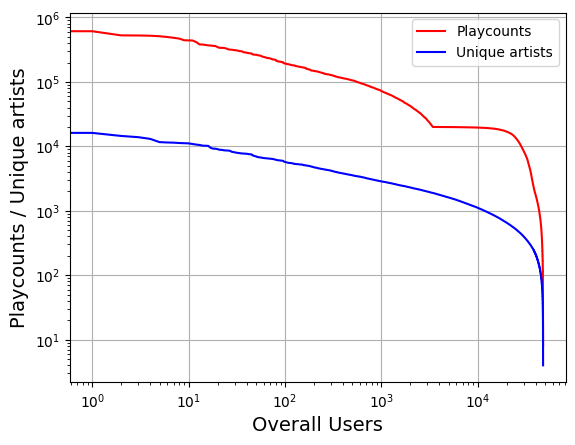

Avg_playcount =  15199.988925314168
Sdev_playcount =  21689.305562778965
Avg_artists =  769.1915689488505
Sdev_artists =  784.5011807958352
Avg_MeanPC =  28.334816038330597
Sdev_MeanPC =  55.293640952824354
Avg_MedianPC =  6.2322426764174335
Sdev_MedianPC =  26.65981048122342


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


STATISTICS_OUTPUT_FILE_BOTH = 'LFM-1b_stats_users.txt'         # output file for statistics (female + male)

# Main program
if __name__ == '__main__':
    # Load figures from file
    data = np.loadtxt(STATISTICS_OUTPUT_FILE_BOTH)

    handle_tpc, = plt.loglog(range(data[:,0].__len__()), sorted(data[:,0], reverse=True), 'r-')
    handle_uqa, = plt.loglog(range(data[:,1].__len__()), sorted(data[:,1], reverse=True), 'b-')
    plt.legend([handle_tpc, handle_uqa], ['Playcounts', 'Unique artists'])


    plt.xlabel('Overall Users', fontsize=14)
    plt.ylabel('Playcounts / Unique artists', fontsize=14)
    plt.grid(True)
    plt.savefig('LFM-1b_user_plot.eps', format='eps', dpi=1000)
    plt.show()

    # Determine additional statistics of the listening events distribution
    Avg_playcount = np.mean(data[:, 0])
    Sdev_playcount = np.std(data[:, 0])
    Avg_artists = np.mean(data[:, 1])
    Sdev_artists = np.std(data[:, 1])
    Avg_MeanPC = np.mean(data[:, 2])
    Sdev_MeanPC = np.std(data[:, 2])
    Avg_MedianPC = np.mean(data[:, 4])
    Sdev_MedianPC = np.std(data[:, 4])

    print("Avg_playcount = ", Avg_playcount)
    print("Sdev_playcount = ", Sdev_playcount)
    print("Avg_artists = ", Avg_artists)
    print("Sdev_artists = ", Sdev_artists)
    print("Avg_MeanPC = ", Avg_MeanPC)
    print("Sdev_MeanPC = ", Sdev_MeanPC)
    print("Avg_MedianPC = ", Avg_MedianPC)
    print("Sdev_MedianPC = ", Sdev_MedianPC)

Plotting and calculating the number of artist that the most active, moderate/highly active and least active users (male + female) listen to

In [ ]:
# Load figures from file
data = np.loadtxt(STATISTICS_OUTPUT_FILE_BOTH)

# Sort the data in descending order for both Playcounts and Unique artists
sorted_tpc = sorted(data[:, 0], reverse=True)
sorted_uqa = sorted(data[:, 1], reverse=True)

# Get x-axis values at 10^0, 10^2, and 10^4 (active listeners/users)
x_values = [10 ** 0, 10 ** 2, 10 ** 4]

# Get y-axis values for Playcounts (red plot) at x = 10^0, 10^2, and 10^4
y_values_tpc = [sorted_tpc[x] for x in x_values]

# Get y-axis values for Unique artists (blue plot) at x = 10^0, 10^2, and 10^4
y_values_uqa = [sorted_uqa[x] for x in x_values]

print("Y-values for Playcounts (red plot) at x = 10^0, 10^2, and 10^4:", y_values_tpc)
print("Y-values for Unique artists (blue plot) at x = 10^0, 10^2, and 10^4:", y_values_uqa)

Y-values for Playcounts (red plot) at x = 10^0, 10^2, and 10^4: [611786.0, 193589.0, 19554.0]
Y-values for Unique artists (blue plot) at x = 10^0, 10^2, and 10^4: [16185.0, 5737.0, 1111.0]
